In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-netflix-shows/netflix_titles.csv


### Netflix EDA 
perform the exploratory  data analysis to understand the dataset

### Task
1) Understand the dataset ,types and missing valve 
2) Clean the dataset and handle the missing valve 
3) perform data visualization
4)Create final summary report


In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv("/kaggle/input/dataset-netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns     ## its returns all Columns name

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# convert datatype from object to Datetime


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [8]:
#df['year'] = df['date'].year
#df['year']= df['date_added'].dt.year,
#df.head(2)

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.head()
df['rating'].unique()          # its shows all unique value in rating column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [11]:

df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


missing value in duration column

# Handaling missing valve

 Rating, cast, country,director have the null filled with 'Unavailable'

In [12]:
df.fillna({'rating': 'unavailable','cast':'unavailable','country':'unavailable','director':'unavailable'},inplace = True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

for nulls in data_added missing data_added is to be subsittuted in with the most recent data from data_added.this is because netflix has the tendancy to add more content over time // other vaible options would be finding actual dates and in putting them manually or dropping the data from result since the amount of missing data is rather small

In [13]:
df[(df['date_added'].isnull())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,unavailable,Igor Dmitriev,unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [14]:
most_recent_entry_date = df['date_added'].max()
df.fillna({'date_added': most_recent_entry_date },inplace = True)



In [15]:
df['date_added'].isnull().sum()

0

now we see in the data_added column successfully filled with most_recent_date

In [16]:
df.loc[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [17]:
## check to make sure there is no othere content with the same director to avoid accidental overwriting

In [18]:
df[df.director == "Louis C.K."].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [19]:
df.loc[df['director'] == 'Louis C.K.' , 'duration'] = df['rating'] ## loc helps us eaisly accessing the columns by name

In [20]:
df[df.director == "Louis C.K."].head()   ## successfully rating column add to duration column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [21]:
df.loc[df['director'] ==  'Louis C.K.' , 'rating'] = 'unavailable'
df[df.director == "Louis C.K."].head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


### **visualization**

lets take a look at types of shows that has been watched on netflix

In [22]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

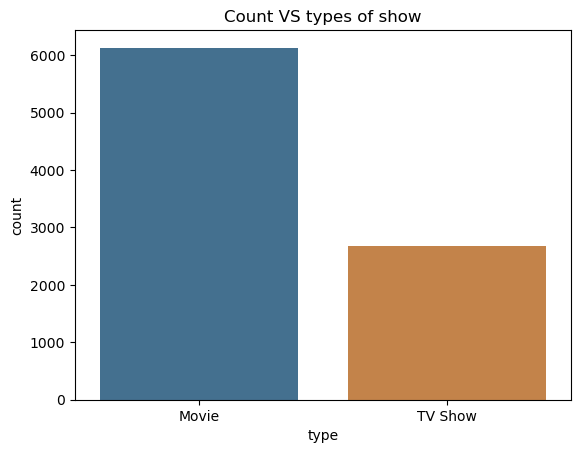

In [23]:
sns.countplot(x ='type' ,data = df ,saturation=.50,)
plt.title("Count VS types of show")
plt.show()

### on netfliex there are more no.of movies as campared TV shows

### Country Analysis

In [24]:
df['country'].value_counts()

United States                             2818
India                                      972
unavailable                                831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

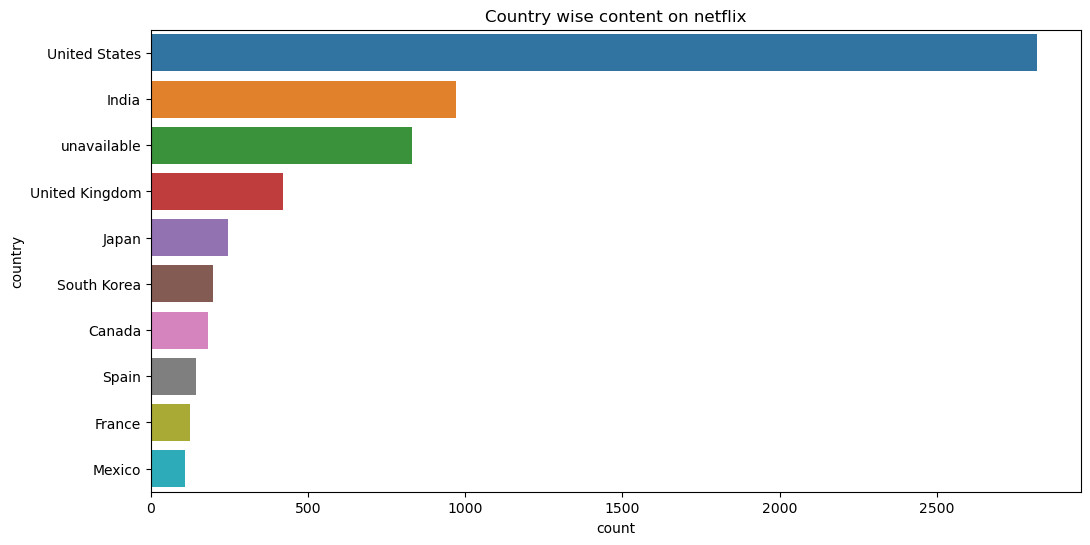

In [25]:
plt.figure(figsize= (12,6))
sns.countplot(y= 'country', order = df['country'].value_counts().index[:10],data = df)
plt.title("Country wise content on netflix")
plt.show

In [26]:
# now checking type of content base on country
movies_countries = df[df['type'] == ('Movie')]
TV_shows_countries = df[df['type'] ==("TV Show")]


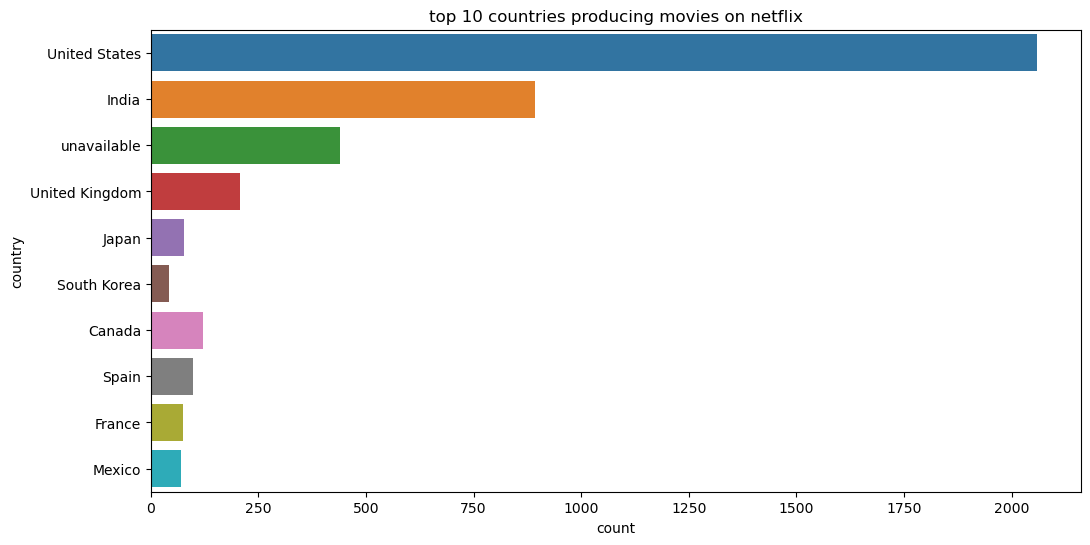

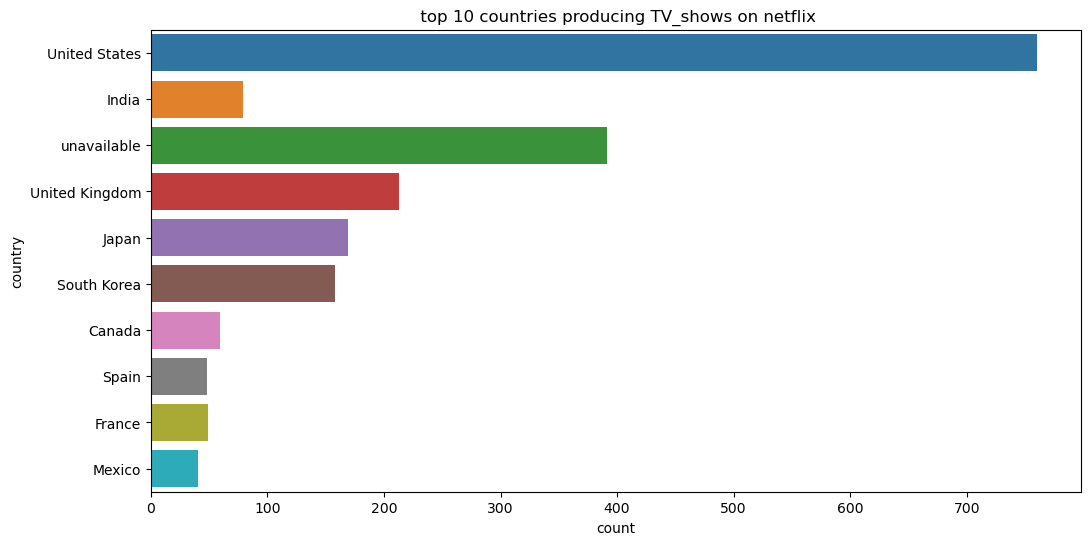

In [27]:
plt.figure(figsize= (12,6))
sns.countplot(y= 'country', order = df['country'].value_counts().index[:10],data = movies_countries)
plt.title("top 10 countries producing movies on netflix")



plt.figure(figsize= (12,6))
sns.countplot(y = 'country',order = df['country'].value_counts().index[:10],data = TV_shows_countries)
plt.title(" top 10 countries producing TV_shows on netflix")
plt.show()

In [28]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [29]:
df['rating'].value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
unavailable       7
TV-Y7-FV          6
NC-17             3
UR                3
Name: rating, dtype: int64

 ### lets check what are the major ratings given to netflix show

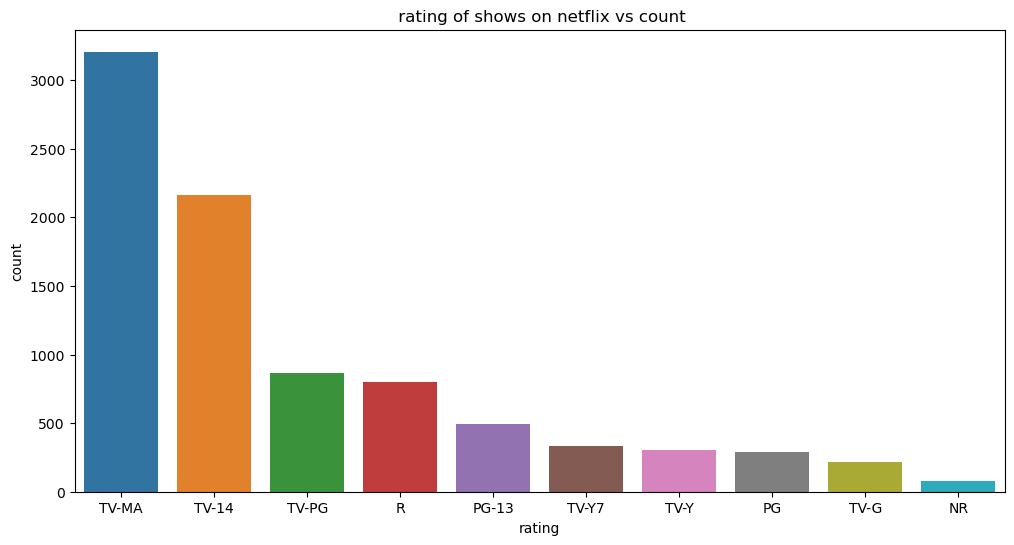

In [30]:
plt.figure(figsize= (12,6))
sns.countplot(x= 'rating', order = df['rating'].value_counts().index[:10],data = df)
plt.title(" rating of shows on netflix vs count")
plt.show()


### most of the shows has TV-MA and TV-14 rating

In [31]:
df['release_year'].value_counts().index[:20]

Int64Index([2018, 2017, 2019, 2020, 2016, 2021, 2015, 2014, 2013, 2012, 2010,
            2011, 2009, 2008, 2006, 2007, 2005, 2004, 2003, 2002],
           dtype='int64')

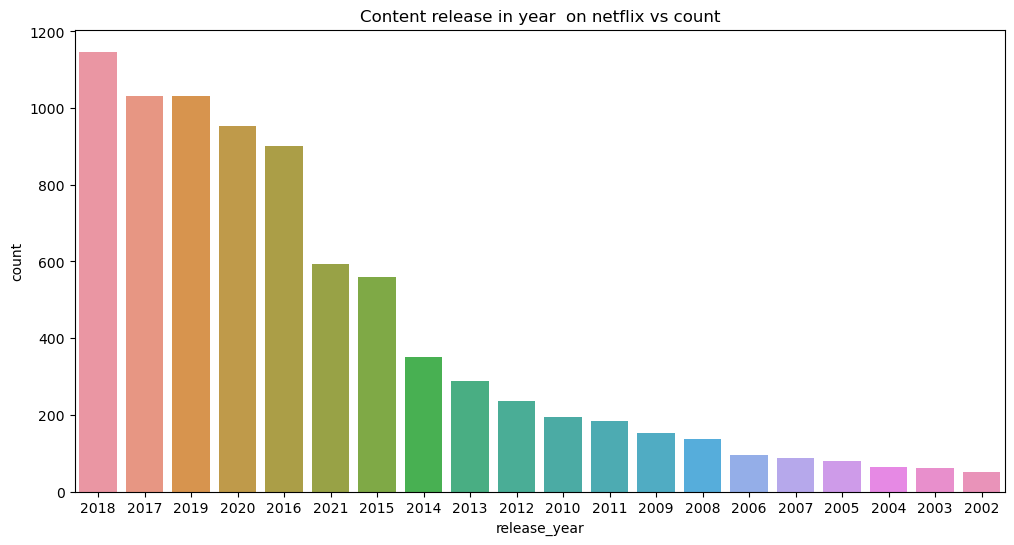

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'release_year',order= df['release_year'].value_counts().index[:20],data = df)
plt.title("Content release in year  on netflix vs count")
plt.show()


### Popular Generes Analysis

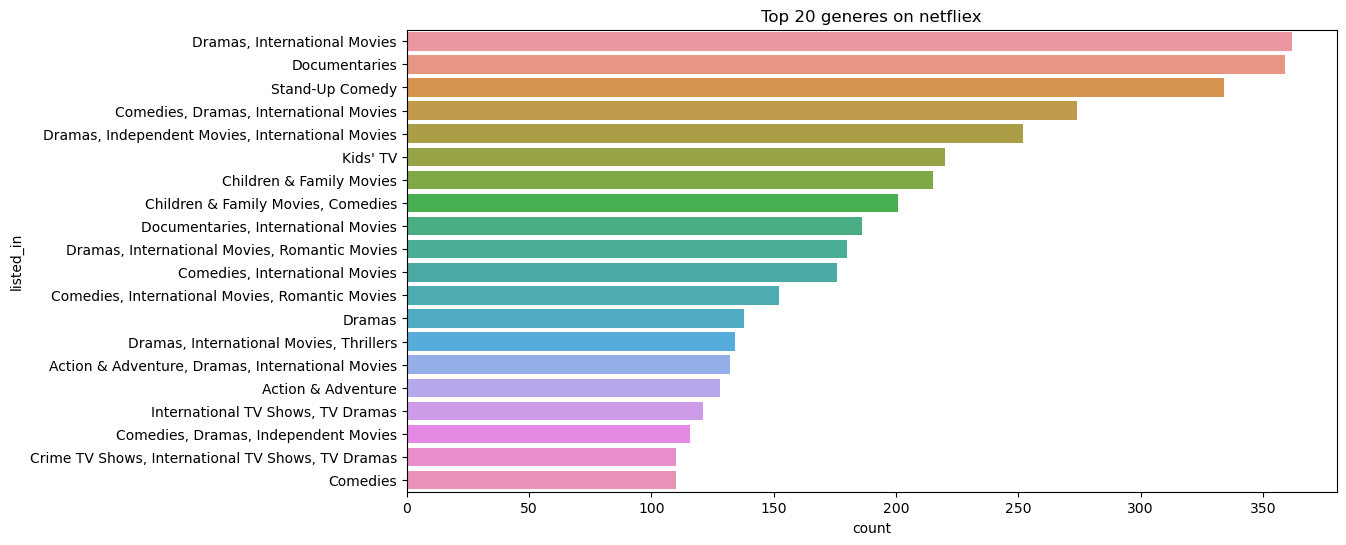

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(y= 'listed_in',order= df['listed_in'].value_counts().index[:20],data = df)
plt.title("Top 20 generes on netfliex")
plt.show()


In [34]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Summary

So far we perform the lote of operations over the dataset and find more information from it.if we have conclude the dataset in few line . then we can say that:
1) netflix more movies then TV shows
2) most number of movies and TV shows produced by United states, followed by india who produced the second most no.of movies on netfliex.
3) Most of the content on netflix (movies and TV shows combined) is for mature audiences
4) 2018 is the year in which netfliex relesed more no.of as compared to other years.
5) international movies and dramas are most popular Geners on netflix
